In [0]:
import pandas as pd
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from sklearn.metrics import max_error
import math
import numpy as np
from sklearn import linear_model

In [0]:
data = pd.read_csv('https://covid19.isciii.es/resources/serie_historica_acumulados.csv', header= 0, encoding= 'unicode_escape')
#geo data CCAA
dfCCAA = pd.read_csv('https://raw.githubusercontent.com/raulgm18/geodata/master/CCAA.csv', header= 0)

In [0]:
#data format spain
pd.DataFrame(data)
data['FECHA'] = pd.to_datetime(data['FECHA'], format='%d/%m/%Y')
dataCCAA = data.drop(data[data['CCAA'].map(len) > 2].index)

In [0]:
#geo data CCAA
dfg = pd.merge(left=dataCCAA, right=dfCCAA, how='left', left_on='CCAA', right_on='CCAA')

In [0]:
#Splitting the dataset
regional_df_list = []
rolling_average_days = 7
for region, data_region_subset in dfg.groupby('CCAA'): #region is equal to each CCAA and saved in a subset
    data_region = data_region_subset.copy()
    data_region['new_deaths_av'] = data_region['Fallecidos'].diff().mask(data_region['Fallecidos'].diff().lt(0),0).rolling(window=rolling_average_days).mean()
    data_region['new_icare_av'] = data_region['UCI'].diff().mask(data_region['UCI'].diff().lt(0),0).rolling(window=rolling_average_days).mean()
    data_region['severe_deaths'] = data_region['new_deaths_av'] + data_region['new_icare_av']
    regional_df_list.append(data_region) #the data split of each region is saved in a list 

In [277]:
regional_df_list

[     CCAA      FECHA  CASOS  ...  new_deaths_av  new_icare_av  severe_deaths
 0      AN 2020-02-20    0.0  ...            NaN           NaN            NaN
 19     AN 2020-02-21    NaN  ...            NaN           NaN            NaN
 38     AN 2020-02-22    NaN  ...            NaN           NaN            NaN
 57     AN 2020-02-23    NaN  ...            NaN           NaN            NaN
 76     AN 2020-02-24    NaN  ...            NaN           NaN            NaN
 ...   ...        ...    ...  ...            ...           ...            ...
 1577   AN 2020-05-13    NaN  ...       6.000000      1.285714       7.285714
 1596   AN 2020-05-14    NaN  ...       6.142857      1.714286       7.857143
 1615   AN 2020-05-15    NaN  ...       5.428571      1.857143       7.285714
 1634   AN 2020-05-16    NaN  ...       5.428571      2.142857       7.571429
 1653   AN 2020-05-17    NaN  ...       5.142857      2.285714       7.428571
 
 [88 rows x 18 columns],
      CCAA      FECHA  CASOS  ...  ne

In [0]:
#Defining algebraic functions
def n_to_date(n):
    # it converts a number to a date, considering starting from peak_date_integer
    return (peak_date_dateformat + timedelta(days=n - peak_date_integer)).strftime('%d/%m/%Y')
def build_line(x1, y1, x2, y2):
    m = float(y2 - y1) / (x2 - x1)
    q = y1 - (m * x1)
    return [m, q]

In [0]:
def calculate_date_zero(linear_regr):
    date_zero_integer = round(- linear_regr.intercept_ / linear_regr.coef_[0])
    date_zero_datetime = n_to_date(date_zero_integer)
    today = datetime.today()
    future = peak_date_dateformat + timedelta(days=date_zero_integer - peak_date_integer)
    remaining_days = (future - today).days
    line_max = build_line(X_test[0][0], y_pred_max[0], X_test[1][0], y_pred_max[1])
    date_zero_max = math.ceil(- line_max[1] / line_max[0])
    date_zero_max = n_to_date(date_zero_max)
    line_min = build_line(X_test[0][0], y_pred_min[0], X_test[1][0], y_pred_min[1])
    date_zero_min = math.floor(- line_min[1] / line_min[0])
    date_zero_min = n_to_date(date_zero_min)
    return date_zero_datetime, date_zero_max, date_zero_min, remaining_days

Creating model for Andalucía
Score : 0.8729857398357809


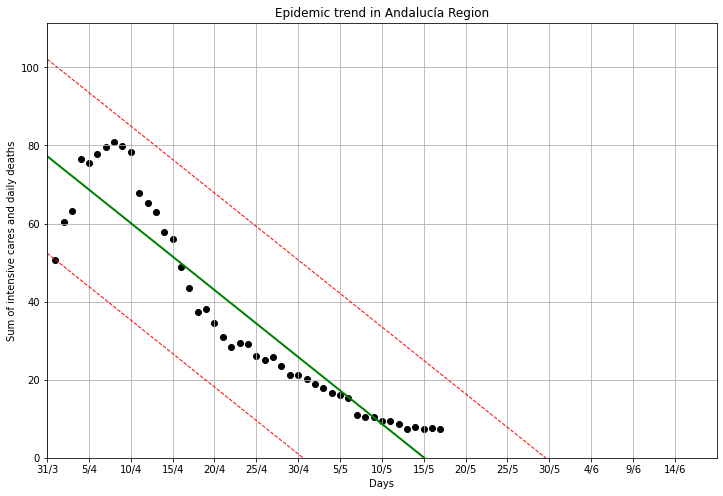

Andalucía Zero intensive cares and deaths expected between 30/05/2020 and 30/04/2020
Creating model for Aragón
Score : 0.9180119897295912


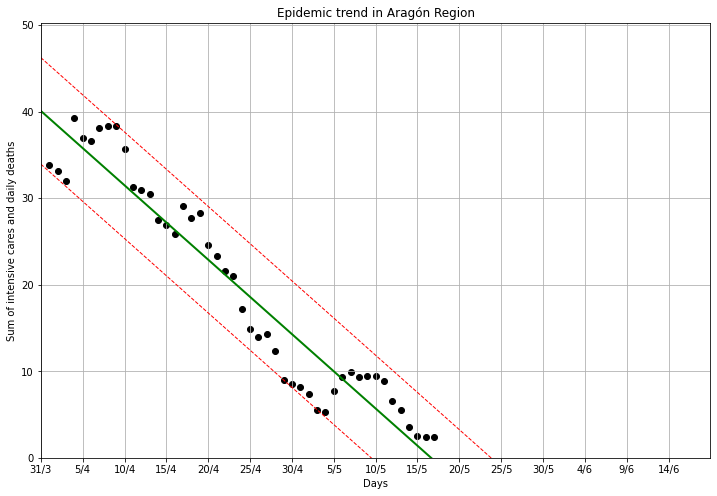

Aragón Zero intensive cares and deaths expected between 24/05/2020 and 09/05/2020
Creating model for Asturias, Principado de
Score : 0.7459564858207641
Asturias, Principado de Zero intensive cares and deaths expected between 20/06/2020 and 15/05/2020
Creating model for Cantabria
Score : 0.9570557384842788


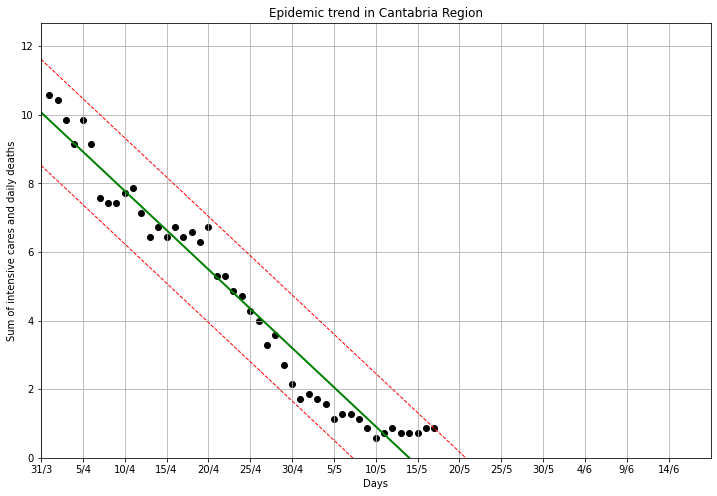

Cantabria Zero intensive cares and deaths expected between 21/05/2020 and 07/05/2020
Creating model for Ceuta
Score : 0.48697732473476196
Ceuta Zero intensive cares and deaths expected between 05/06/2020 and 03/04/2020
Creating model for Castilla y León
Score : 0.9613770729515443


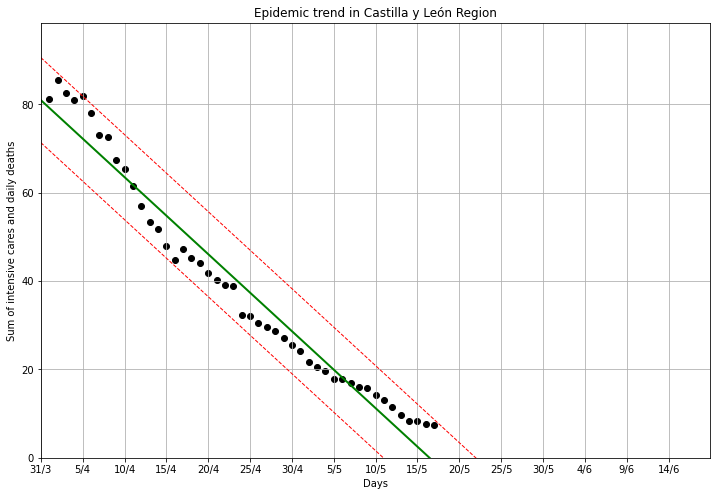

Castilla y León Zero intensive cares and deaths expected between 22/05/2020 and 10/05/2020
Creating model for Castilla - La Mancha
Score : 0.8363975120511875
Castilla - La Mancha Zero intensive cares and deaths expected between 14/06/2020 and 13/05/2020
Creating model for Canarias
Score : 0.7049679624039834
Canarias Zero intensive cares and deaths expected between 05/06/2020 and 18/04/2020
Creating model for Cataluña
Score : 0.9564214747547258


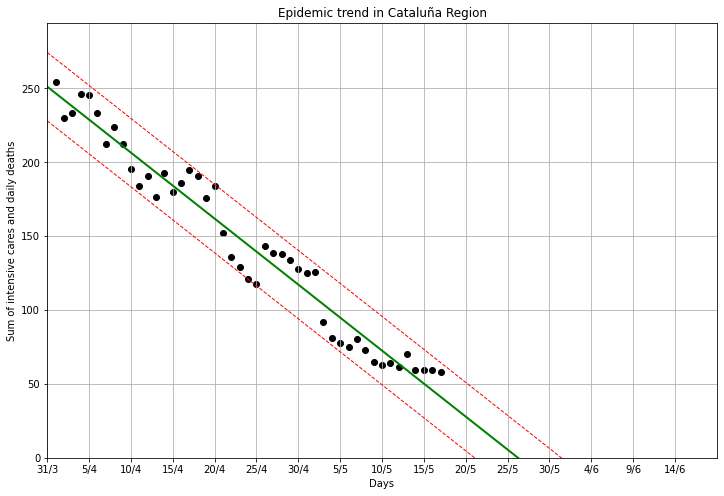

Cataluña Zero intensive cares and deaths expected between 01/06/2020 and 21/05/2020
Creating model for Extremadura
Score : 0.8674577999802177


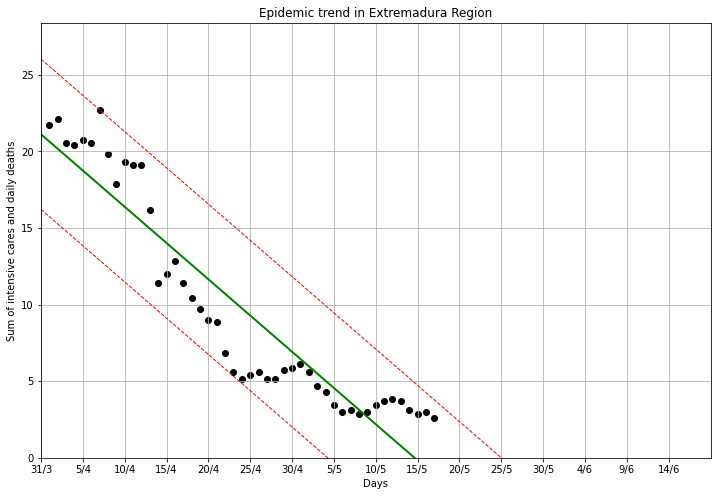

Extremadura Zero intensive cares and deaths expected between 26/05/2020 and 04/05/2020
Creating model for Galicia
Score : 0.4655644730793844
Galicia Zero intensive cares and deaths expected between 30/06/2020 and 24/04/2020
Creating model for Balears, Illes
Score : 0.8607316020340173


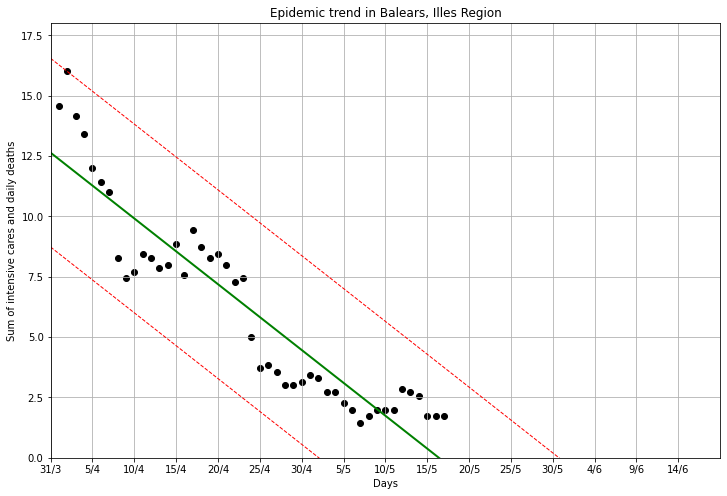

Balears, Illes Zero intensive cares and deaths expected between 31/05/2020 and 02/05/2020
Creating model for Murcia, Región de
Score : 0.8377657240126694
Murcia, Región de Zero intensive cares and deaths expected between 29/05/2020 and 26/04/2020
Creating model for Madrid, Comunidad de
Score : 0.20278606256408216
Madrid, Comunidad de Zero intensive cares and deaths expected between 08/08/2020 and 03/04/2020
Creating model for Melilla
Score : 0.38445075028857245
Melilla Zero intensive cares and deaths expected between 22/06/2020 and 14/03/2020
Creating model for Navarra, Comunidad Foral de
Score : 0.5395277504816032
Navarra, Comunidad Foral de Zero intensive cares and deaths expected between 23/06/2020 and 19/04/2020
Creating model for País Vasco
Score : 0.9773780850739429


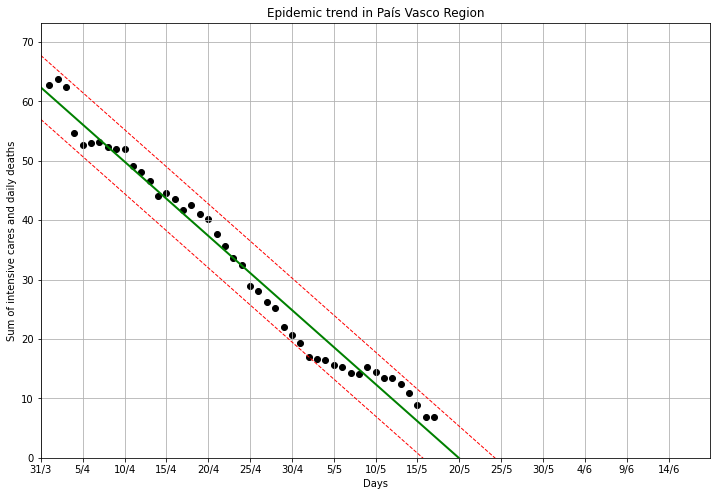

País Vasco Zero intensive cares and deaths expected between 25/05/2020 and 15/05/2020
Creating model for Rioja, La
Score : 0.9308899252412437


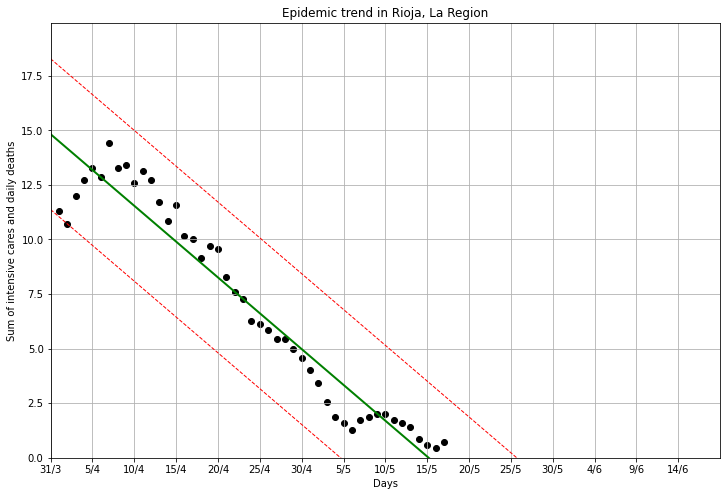

Rioja, La Zero intensive cares and deaths expected between 26/05/2020 and 04/05/2020
Creating model for Comunitat Valenciana
Score : 0.935311460610437


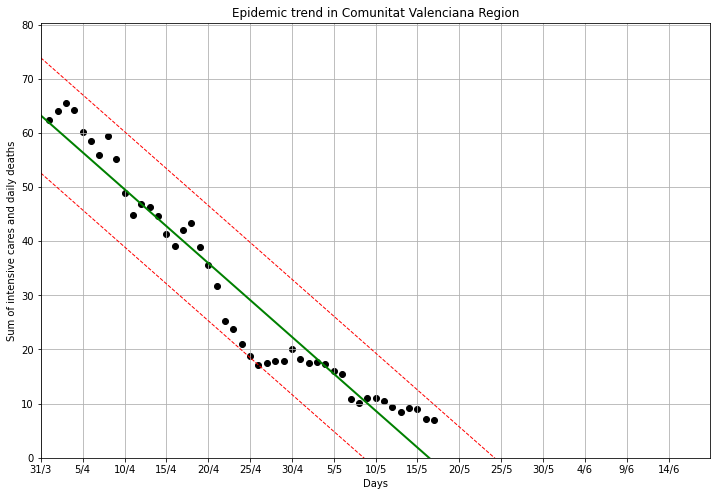

Comunitat Valenciana Zero intensive cares and deaths expected between 25/05/2020 and 08/05/2020


In [281]:
#Build and train models
model_score_threshold = 0.85
model_outputs_df = pd.DataFrame()
for data in regional_df_list:
    date = data['FECHA']
    region_name = data["NOMBRE_CODE"].iloc[0]
    region_code = data["INE_CCAA"].iloc[0]
    print("Creating model for " + region_name)
    date_format = date
    # Creating Linear Regression Model
    linear_regr = linear_model.LinearRegression()
    # Preparing the lists with past data, that we will use for training the model
    X = date_format
    y = data['severe_deaths'].tolist()[1:]
    # date format is not suitable for modeling, let's transform the date into incrementals number starting from April 1st
    peak_date_integer = 40  # April 1st is the 40th day of the series
    day_numbers = []
    for i in range(1, len(X)):
        day_numbers.append([i])
    X = day_numbers
    # Extracting data after the peak, that we will use for training the model
    X = X[peak_date_integer:]
    y = y[peak_date_integer:]
    # Train the model using the training sets
    linear_regr.fit(X, y)
    model_score = linear_regr.score(X, y)
    print("Score : %s" % (model_score))

    # Predict future trend
    y_pred = linear_regr.predict(X)
    error = max_error(y, y_pred)
    error
    X_test = []
    future_days = 80
    for i in range(peak_date_integer, peak_date_integer + future_days):
        X_test.append([i])
    y_pred_linear = linear_regr.predict(X_test)
    y_pred_max = []
    y_pred_min = []
    for i in range(0, len(y_pred_linear)):
        y_pred_max.append(y_pred_linear[i] + error)
        y_pred_min.append(y_pred_linear[i] - error)

    # convert date 0 into datetime format
    peak_date_dateformat = (data['FECHA'].iloc[peak_date_integer])
    # date forecast
    date_prev = []
    x_ticks = []
    step = 5
    data_curr = peak_date_dateformat
    x_current = peak_date_integer
    n = int(future_days / step)
    for i in range(0, n):
        date_prev.append(str(data_curr.day) + "/" + str(data_curr.month))
        x_ticks.append(x_current)
        data_curr = data_curr + timedelta(days=step)
        x_current = x_current + step

    if model_score >= model_score_threshold: 
        plt.title("Epidemic trend in %s Region" % region_name)
        # adjust plot size
        F = plt.gcf()
        Size = F.get_size_inches()
        F.set_size_inches(Size[0] * 2, Size[1] * 2, forward=True)
        # plot known data
        plt.scatter(X, y, color='black')
        # plot linear regression prediction
        plt.plot(X_test, y_pred_linear, color='green', linewidth=2)
        # plot maximum error
        plt.plot(X_test, y_pred_max, color='red', linewidth=1, linestyle='dashed')
        # plot minimum error
        plt.plot(X_test, y_pred_min, color='red', linewidth=1, linestyle='dashed')
        plt.xlabel('Days')
        plt.xlim(peak_date_integer, peak_date_integer + future_days)
        plt.ylim(bottom=0)
        plt.xticks(x_ticks, date_prev)
        plt.ylabel('Sum of intensive cares and daily deaths')
        # plt.yscale("log")
        # add grid
        plt.grid()
        plt.savefig("prediction.png")
        plt.show()


    date_zero_datetime, date_zero_max, date_zero_min, remaining_days = calculate_date_zero(linear_regr)
    print("%s Zero intensive cares and deaths expected between %s and %s" % (region_name, date_zero_max, date_zero_min))

    temp = pd.DataFrame(
        {
            'region_name': region_name,
            'COD_REG': int(region_code),
            'remaining_days': remaining_days,
            'date_zero': date_zero_datetime,
            'date_zero_max': date_zero_max,
            'date_zero_min': date_zero_min,
            'model_score': model_score
        }, index=[region_code]
    )

    model_outputs_df = pd.concat([model_outputs_df, temp])


In [282]:
pd.set_option('display.width', 1000)
print(model_outputs_df)


                    region_name  COD_REG  ...  date_zero_min model_score
1                     Andalucía        1  ...     30/04/2020    0.872986
2                        Aragón        2  ...     09/05/2020    0.918012
3       Asturias, Principado de        3  ...     15/05/2020    0.745956
6                     Cantabria        6  ...     07/05/2020    0.957056
18                        Ceuta       18  ...     03/04/2020    0.486977
7               Castilla y León        7  ...     10/05/2020    0.961377
8          Castilla - La Mancha        8  ...     13/05/2020    0.836398
5                      Canarias        5  ...     18/04/2020    0.704968
9                      Cataluña        9  ...     21/05/2020    0.956421
11                  Extremadura       11  ...     04/05/2020    0.867458
12                      Galicia       12  ...     24/04/2020    0.465564
4                Balears, Illes        4  ...     02/05/2020    0.860732
14            Murcia, Región de       14  ...     2

In [0]:
#latest data to regions
dfLast = dfg.sort_values(by='FECHA').drop_duplicates(subset=['CCAA'], keep='last')
model_outputs_with_latest_data = pd.merge(left=dfLast, right=model_outputs_df, how='left', left_on='INE_CCAA', right_on='COD_REG')

#exporting dataframe to csv
today = datetime.today()
model_outputs_with_latest_data.to_csv('model_outputs_%s%02d%s.csv' % (today.year, today.month, today.day))

In [285]:
model_outputs_with_latest_data

,CCAA,FECHA,CASOS,PCR+,TestAc+,Hospitalizados,UCI,Fallecidos,Recuperados,Nombre,Lat,Long,NOMBRE_CODE,INE_CCAA,Población,region_name,COD_REG,remaining_days,date_zero,date_zero_max,date_zero_min,model_score
0,EX,2020-05-17,NaN,2948.0,1001.0,1775.0,110.0,500.0,2652.0,Extremadura,"39,4937392","-6,0679194",Extremadura,11,1.067.710,Extremadura,11,-5,15/05/2020,26/05/2020,04/05/2020,0.867458
1,GA,2020-05-17,NaN,9056.0,1926.0,2934.0,332.0,607.0,9204.0,Galicia,"42,5750554","-8,1338558",Galicia,12,2.699.499,Galicia,12,7,27/05/2020,30/06/2020,24/04/2020,0.465564
2,NC,2020-05-17,NaN,5178.0,3157.0,2045.0,136.0,503.0,3905.0,Navarra,"42,6953909","-1,6760691","Navarra, Comunidad Foral de",15,654.214,"Navarra, Comunidad Foral de",15,2,22/05/2020,23/06/2020,19/04/2020,0.539528
3,ML,2020-05-17,NaN,121.0,13.0,44.0,3.0,2.0,125.0,Melilla,"35,2922775","-2,9380973",Melilla,19,86.487,Melilla,19,-17,03/05/2020,22/06/2020,14/03/2020,0.384451
4,MC,2020-05-17,NaN,1556.0,1039.0,678.0,112.0,145.0,2180.0,Murcia,"37,9922399","-1,1306544","Murcia, Región de",14,1.493.898,"Murcia, Región de",14,-8,12/05/2020,29/05/2020,26/04/2020,0.837766
5,VC,2020-05-17,NaN,10914.0,3810.0,5469.0,725.0,1370.0,9970.0,C. Valenciana,"39,4840108","-0,7532809",Comunitat Valenciana,10,5.003.769,Comunitat Valenciana,10,-4,16/05/2020,25/05/2020,08/05/2020,0.935311
6,MD,2020-05-17,NaN,66302.0,5293.0,42283.0,3594.0,8863.0,40736.0,Madrid,"40,4167754","-3,7037902","Madrid, Comunidad de",13,6.663.394,"Madrid, Comunidad de",13,17,06/06/2020,08/08/2020,03/04/2020,0.202786
7,CE,2020-05-17,NaN,116.0,59.0,11.0,4.0,4.0,163.0,Ceuta,"35,8893874","-5,3213455",Ceuta,18,84.777,Ceuta,18,-15,05/05/2020,05/06/2020,03/04/2020,0.486977
8,CN,2020-05-17,NaN,2294.0,0.0,942.0,178.0,153.0,1537.0,Canarias,"28,2915637","-16,6291304",Canarias,5,2.153.389,Canarias,5,-8,12/05/2020,05/06/2020,18/04/2020,0.704968
9,CL,2020-05-17,NaN,18512.0,6234.0,8717.0,551.0,1953.0,8716.0,Castilla y León,"41,8356821","-4,3976357",Castilla y León,7,2.399.548,Castilla y León,7,-4,16/05/2020,22/05/2020,10/05/2020,0.961377


In [286]:
!pip install --upgrade geopandas
!pip install mapclassify


Requirement already up-to-date: geopandas in /usr/local/lib/python3.6/dist-packages (0.7.0)


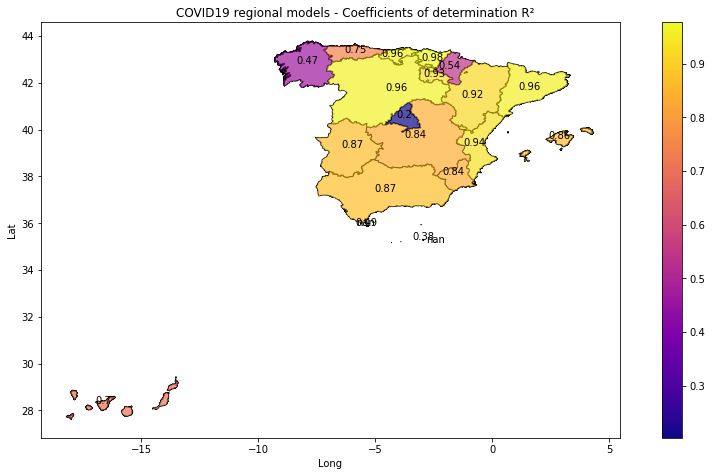

In [287]:
#Mapping models' performance
#importing mapping libraries
import geopandas as gpd
import os
#opening shapefile
url = "https://github.com/raulgm18/geodata/raw/master/CCAA.geojson"
df = gpd.read_file(url)
#joining model outputs to the shapefile
df = pd.merge(left=df, right=model_outputs_df, how='left', left_on='INE_CCAA', right_on='COD_REG')
#map settings
fig, ax = plt.subplots(figsize = (15,7))
fig.subplots_adjust(top=0.95)
fig.suptitle('COVID19 regional models - Coefficients of determination R²',fontsize = 12)
#leyend
df.plot(column = 'model_score', cmap = 'plasma', ax=ax, legend=True, alpha=0.7, zorder=3)
df.geometry.boundary.plot(color=None, edgecolor='k', linewidth = 1, ax=ax) 
#adding labels
df['coords'] = df['geometry'].apply(lambda x: x.representative_point().coords[:])
df['coords'] = [coords[0] for coords in df['coords']]
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
for idx, row in df.iterrows():
    plt.annotate(s=str(round(row['model_score'],2)), xy=row['coords'],
                 horizontalalignment='center')
plt.savefig("COVID_model_scores_map.png")


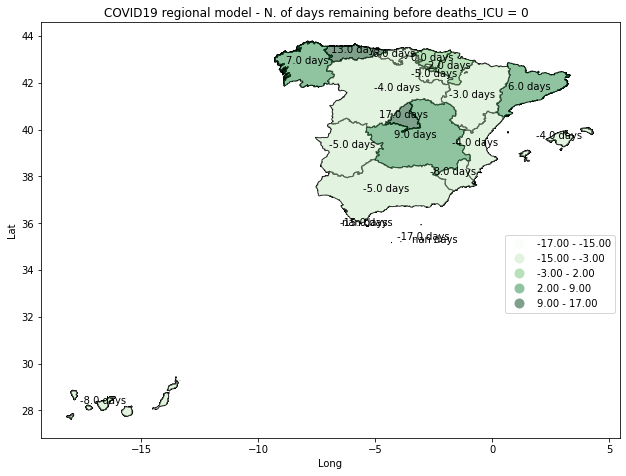

In [288]:
#Mapping models' predictions
#opening shapefile
url = "https://github.com/raulgm18/geodata/raw/master/CCAA.geojson"
df = gpd.read_file(url)
#joining model outputs to the shapefile
df = pd.merge(left=df, right=model_outputs_df, how='left', left_on='INE_CCAA', right_on='COD_REG')
#map settings
fig, ax = plt.subplots(figsize = (15,7))
fig.subplots_adjust(top=0.95)
fig.suptitle('COVID19 regional model - N. of days remaining before deaths_ICU = 0',fontsize = 12)
df.plot(column = 'remaining_days', cmap = 'Greens', ax=ax, legend=True, scheme='FisherJenks', alpha=0.5, zorder=3)
df.geometry.boundary.plot(color=None, edgecolor='k', linewidth = 1, ax=ax)
# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.0,0.5))

#adding labels
df['coords'] = df['geometry'].apply(lambda x: x.representative_point().coords[:])
df['coords'] = [coords[0] for coords in df['coords']]
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
for idx, row in df.iterrows():
    plt.annotate(s=str(row['remaining_days']) + " days", xy=row['coords'],
                 horizontalalignment='center')
plt.savefig("COVID_regional_models_map_nofilter.png")


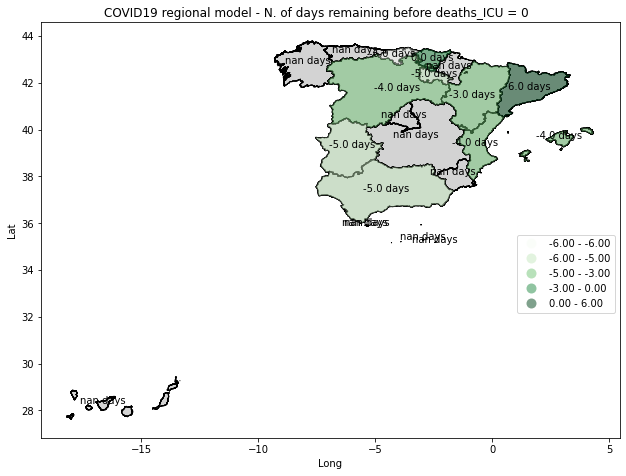

In [289]:
#Combining predictions with models reliability
#opening shapefile
url = "https://github.com/raulgm18/geodata/raw/master/CCAA.geojson"
df = gpd.read_file(url)
background = df
model_outputs_df_filtered = model_outputs_df[model_outputs_df['model_score'] > model_score_threshold]
#joining model outputs to the shapefile
df = pd.merge(left=df, right=model_outputs_df_filtered, how='left', left_on='INE_CCAA', right_on='COD_REG')
#map settings
fig, ax = plt.subplots(figsize = (15,7))
fig.subplots_adjust(top=0.95)
fig.suptitle('COVID19 regional model - N. of days remaining before deaths_ICU = 0',fontsize = 12)
df.geometry.boundary.plot(color=None, edgecolor='k', linewidth = 1, ax=ax) 
background.geometry.boundary.plot(color=None, edgecolor='k', linewidth = 1, ax=ax) 
background.plot(color='lightgray', edgecolor='k', linewidth = 1, ax=ax, legend=True) 
df.plot(column = 'remaining_days', cmap = 'Greens', ax=ax, legend=True, scheme='FisherJenks', alpha=0.5, zorder=3)
# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.0,0.5))

#adding labels
df['coords'] = df['geometry'].apply(lambda x: x.representative_point().coords[:])
df['coords'] = [coords[0] for coords in df['coords']]
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
for idx, row in df.iterrows():
    plt.annotate(s=str(row['remaining_days']) + " days", xy=row['coords'],
                 horizontalalignment='center')
plt.savefig("COVID_regional_models_map.png")


In [290]:
#Cleaning output table and saving csv
export_table = model_outputs_df.copy()
export_table.loc[export_table['model_score'] < model_score_threshold, 'remaining_days'] = 'No Data'
export_table.loc[export_table['model_score'] < model_score_threshold, 'date_zero_min'] = 'No Data'
export_table.loc[export_table['model_score'] < model_score_threshold, 'date_zero_max'] = 'No Data'
export_table.loc[export_table['model_score'] < model_score_threshold, 'date_zero'] = 'No Data'
export_table.sort_index(inplace=True)
del export_table['COD_REG']
print(export_table)
export_table.to_csv('export_table_%s%02d%s.csv' % (today.year, today.month, today.day))


                    region_name remaining_days  ... date_zero_min model_score
1                     Andalucía             -5  ...    30/04/2020    0.872986
2                        Aragón             -3  ...    09/05/2020    0.918012
3       Asturias, Principado de        No Data  ...       No Data    0.745956
4                Balears, Illes             -4  ...    02/05/2020    0.860732
5                      Canarias        No Data  ...       No Data    0.704968
6                     Cantabria             -6  ...    07/05/2020    0.957056
7               Castilla y León             -4  ...    10/05/2020    0.961377
8          Castilla - La Mancha        No Data  ...       No Data    0.836398
9                      Cataluña              6  ...    21/05/2020    0.956421
10         Comunitat Valenciana             -4  ...    08/05/2020    0.935311
11                  Extremadura             -5  ...    04/05/2020    0.867458
12                      Galicia        No Data  ...       No Dat